<center><h2><span style="font-weight:bolder; color: red; font-size:120%">💳 Credit Card Fraud Detection Using Machine Learning Algorithms (Classification)</span></h2></center>

<div style="
  text-align:center;
  background: linear-gradient(135deg, #000000, #1a1a1a);
  border:2px solid #ff0800ff;
  border-radius:18px;
  padding:25px;
  box-shadow:0 0 25px rgba(255,8,0,0.3);
  transition:all 0.4s ease;
">
  <img src="image.png"
       width="680"
       style="
         border-radius:15px;
         box-shadow:0 0 35px rgba(255,8,0,0.4);
         transition: transform 0.4s ease, box-shadow 0.4s ease;
       "
       onmouseover="this.style.transform='scale(1.05)'; this.style.boxShadow='0 0 50px rgba(255,8,0,0.9)';"
       onmouseout="this.style.transform='scale(1.0)'; this.style.boxShadow='0 0 30px rgba(255,8,0,0.4)';"
  >
  <p style="
     color:#FFD700;
     font-size:20px;
     font-family:'Poppins', sans-serif;
     font-weight:600;
     margin-top:12px;
     letter-spacing:1px;
     text-shadow:0 0 10px rgba(255,8,0,0.8);
  ">
  Advanced Security Intelligence: Predicting Fraud with Precision.
  </p>
</div>

<a id="read"></a>
# <p style="background-color:#8B0000; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 1 | Import Libraries</p>

In [1]:
# Standard data science stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive visualizations
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore') # Filter out library warnings

# Model selection and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
)

# Advanced techniques for imbalanced data and tuning
from imblearn.over_sampling import SMOTE
import optuna
import pickle
import shap

# Extensive set of Classifiers for benchmarking
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, 
    ExtraTreesClassifier, VotingClassifier, StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

<a id="intro"></a>
# <p style="background-color:#8B0000; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 2 | Introduction</p>

____
<a id="intro_text"></a>
# <b><span style='color:orangered'>Step 2.1 |</span><span style='color:maroon'> Introduction</span></b>

<div
  style="border-radius:10px; border:#8B0000 solid; padding:15px; background-color:#FAF3F3; font-size:100%; text-align:left; color:#222;">
  <h3 align="left" style="color:#8B0000;">Project Overview</h3>
  <p style="margin:6px 0 0; line-height:1.6;">
    This project focuses on <strong>detecting fraudulent credit card transactions</strong> using advanced <strong>Machine Learning algorithms</strong>. 
    The dataset contains transactions made by European cardholders in September 2013. Out of 284,807 transactions, only 492 are frauds, making the dataset <strong>highly imbalanced</strong> (0.172%).
    <br><br>
    We aim to build a reliable system to clean the data, use <strong>SMOTE</strong> to balance the groups, and use <strong>different models</strong> to catch fraud accurately while keeping mistakes low.
  </p>
</div>

____
<a id="dataset_info"></a>
# <b><span style='color:orangered'>Step 2.2 |</span><span style='color:maroon'> About the dataset and its features</span></b>

<div
    style="border-radius:15px; border:#8B0000 solid; padding:10px; background-color:#FAF3F3; font-size:100%; text-align:left; color:#222;">
    Used dataset: <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud" target="_blank">Credit Card Fraud Detection Dataset (Kaggle)</a>
</div>

<div class="container">
    <h3 style='color:#8B0000; text-align:center;'>Transaction Dataset Attributes</h3>
    <table style='border-radius:10px; border:#8B0000 solid; width:100%; border-collapse:collapse; margin-top:10px;'>
          <tr style='background-color:white; color:black; border-bottom:2px solid rgba(236, 243, 243, 1);'>
            <th style='padding:10px;'>Attribute</th>
            <th style='padding:10px;'>Description</th>
            <th style='padding:10px;'>Type</th>
          </tr>
          <tr style='border-bottom:1px solid rgba(244, 243, 243, 1);'>
            <td style='padding:8px;'>Time</td>
            <td style='padding:8px;'>Seconds passed between this and the first transaction.</td>
            <td style='padding:8px;'>Numeric</td>
          </tr>
          <tr style='border-bottom:1px solid rgba(244, 243, 243, 1);'>
            <td style='padding:8px;'>V1 - V28</td>
            <td style='padding:8px;'>V1 - V28 These are 28 numerical features generated through Principal Component Analysis (PCA). Due to privacy and confidentiality concerns/privacy issues, the original personal data (such as location, merchant, or cardholder details) has been transformed into these abstract/numeric variables while protecting the underlying/hidden statistical relationships.</td>
            <td style='padding:8px;'>Numeric</td>
          </tr>
          <tr style='border-bottom:1px solid rgba(244, 243, 243, 1);'>
            <td style='padding:8px;'>Amount</td>
            <td style='padding:8px;'>Transaction amount.</td>
            <td style='padding:8px;'>Numeric</td>
          </tr>
          <tr style='border-bottom:1px solid rgba(244, 243, 243, 1);'>  
            <td style='padding:8px;'>Class</td>
            <td style='padding:8px;'>1 for Fraud, 0 for Legitimate/Normal. (Target)</td>
            <td style='padding:8px;'>Boolean</td>
          </tr>
    </table>
</div>

<a id="data_col"></a>
# <p style="background-color:#8B0000; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 3 | Data Collection</p>

In [2]:
# Load the dataset
import os
file_path = "creditcard.csv"

if not os.path.exists(file_path):
    print("ERROR: 'creditcard.csv' not found.")
    print("IF IN COLAB: Upload 'creditcard.csv' to the Files sidebar.")
    raise FileNotFoundError("creditcard.csv is missing!")

df = pd.read_csv(file_path)

# Display basic dataset dimensions and preview top entries
print("Number of Records:", df.shape[0])
print("Number of Features:", df.shape[1])
df.head(3)

Number of Records: 284807
Number of Features: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


<a id="preprocess"></a>
# <p style="background-color:#8B0000; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 4 | Data Preprocessing</p>

In [3]:
# Data Quality Check: Nulls and Duplicates
print("Max nulls per column:", df.isnull().sum().max())
df.drop_duplicates(inplace=True) # Remove redundant rows

Max nulls per column: 0


In [4]:
# Standardizing Features: Amount and Time vary significantly in magnitude
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

<a id="eda"></a>
# <p style="background-color:#8B0000; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 5 | Exploratory Data Analysis (EDA)</p>

<b><span style='color:orangered'>Step 5.1 |</span><span style='color:maroon'> Introduction</span></b>

In [5]:
# Load dataset
df = pd.read_csv("creditcard.csv")

# First 5 rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Dataset shape
df.shape

(284807, 31)

In [7]:
# Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Target variable distribution
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# Percentage distribution
df['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

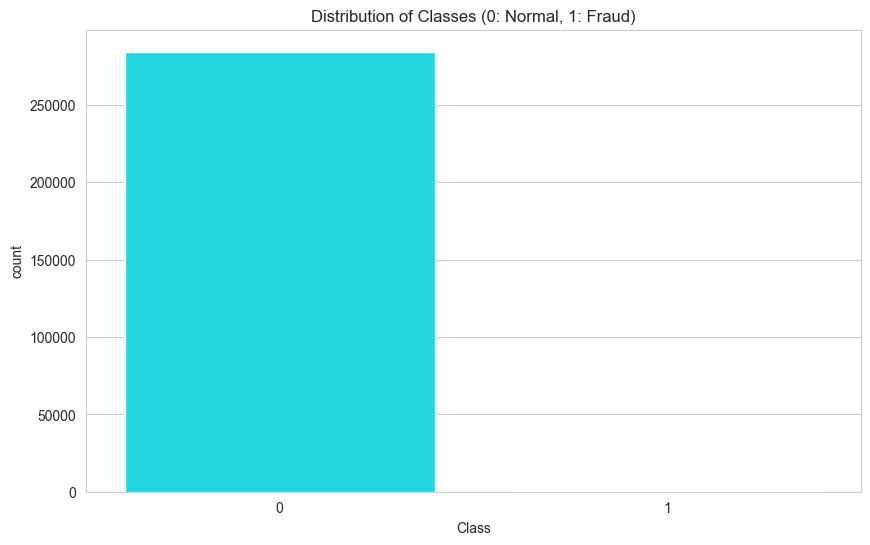

Class distribution count:
 Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
# Visualizing Class Imbalance - Fixed palette using list to avoid key error
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='Class', data=df, palette=['#00f2ff', '#ff0800'])
plt.title("Distribution of Classes (0: Normal, 1: Fraud)")
plt.show()

# Print exact counts to understand the scale of imbalance
print("Class distribution count:\n", df['Class'].value_counts())

In [11]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759088e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251210e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.655224e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321417e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.650335e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248462e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054652e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777941e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179734e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


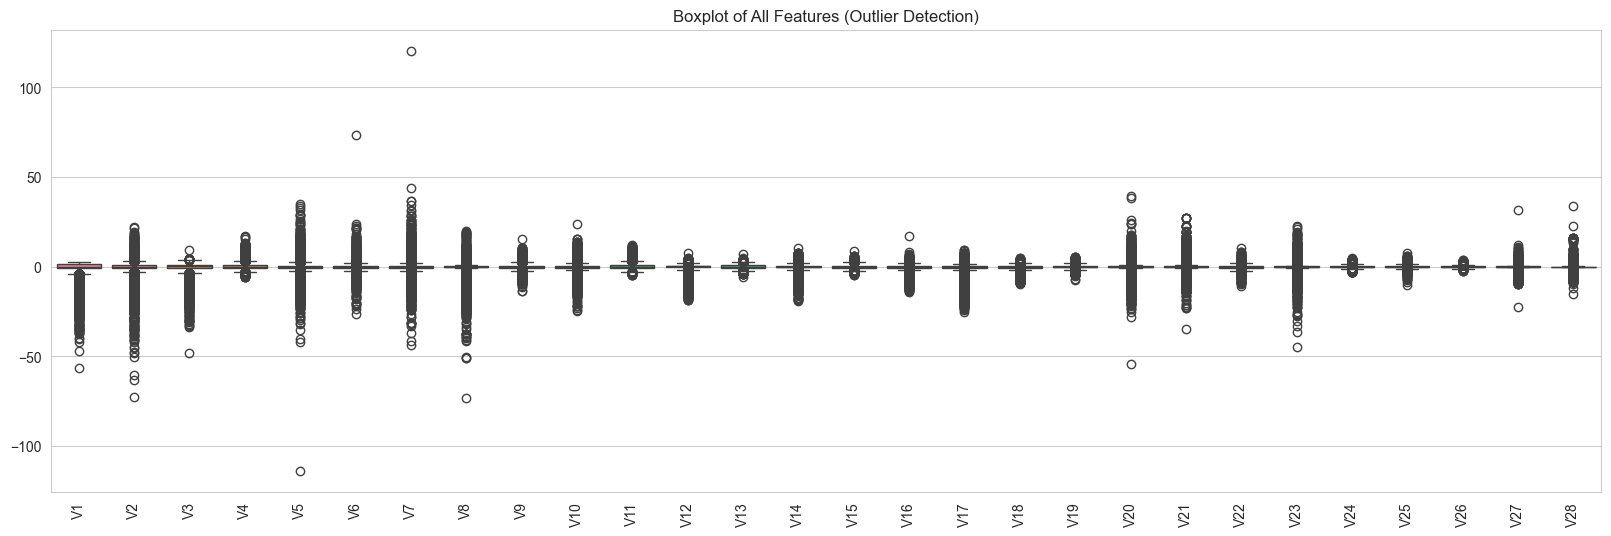

In [12]:
# Boxplot to detect outliers in features
plt.figure(figsize=(20, 6))
sns.boxplot(data=df.drop(columns=['Class', 'Time', 'Amount']))

# Rotate feature names for readability
plt.xticks(rotation=90)
plt.title("Boxplot of All Features (Outlier Detection)")
plt.show()

<b><span style='color:orangered'>Step 5.2 |</span><span style='color:maroon'> Univariate Analysis</span></b>

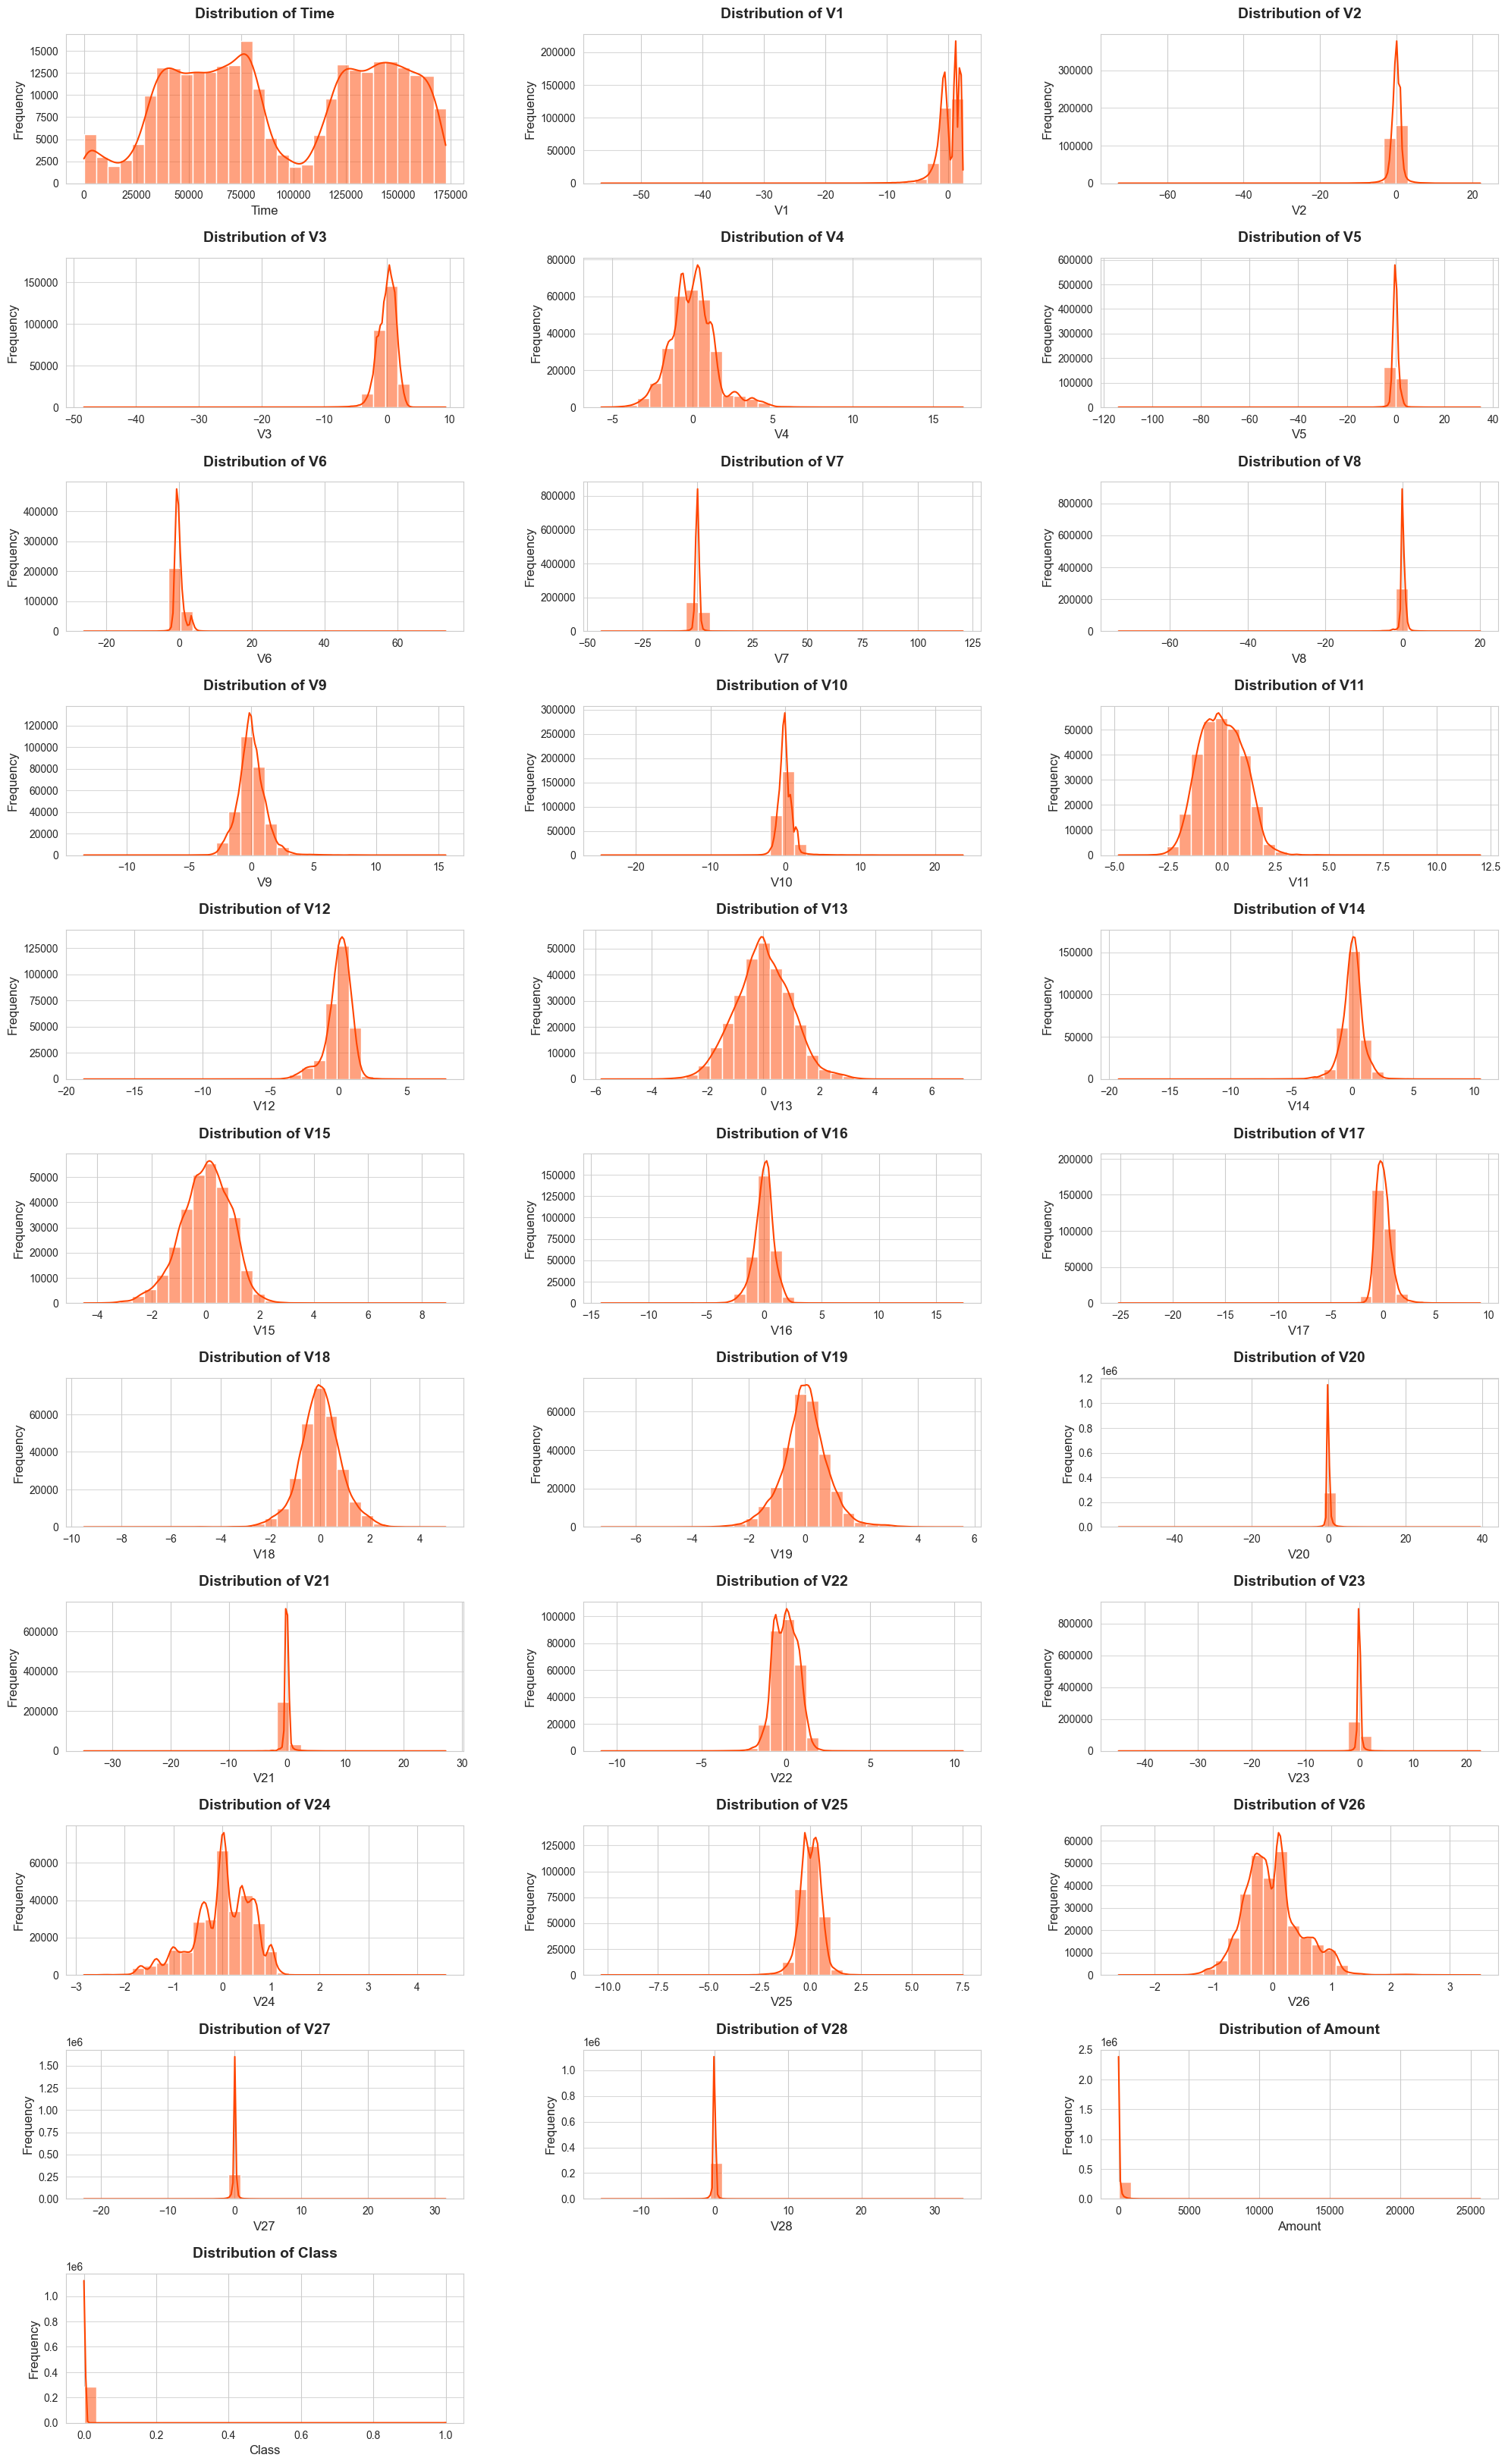

In [13]:
# All numeric columns (example list)
cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

# Create subplots
fig, ax = plt.subplots(nrows=11, ncols=3, figsize=(20, 35))  # increase figure height
ax = ax.flatten()

# Loop through columns and axes together
for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, color='orangered', bins=30, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold', pad=15)  # pad adds space above title
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Frequency', fontsize=12)
    ax[i].grid(axis='y', alpha=0.75)

# Remove empty subplots (if any)
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

# Adjust spacing between plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3, bottom=0.05, top=0.95)  # hspace increases vertical space

plt.show()

<b><span style='color:orangered'>Step 5.3 |</span><span style='color:maroon'> Bivariate Analysis For Numeric Features</span></b>

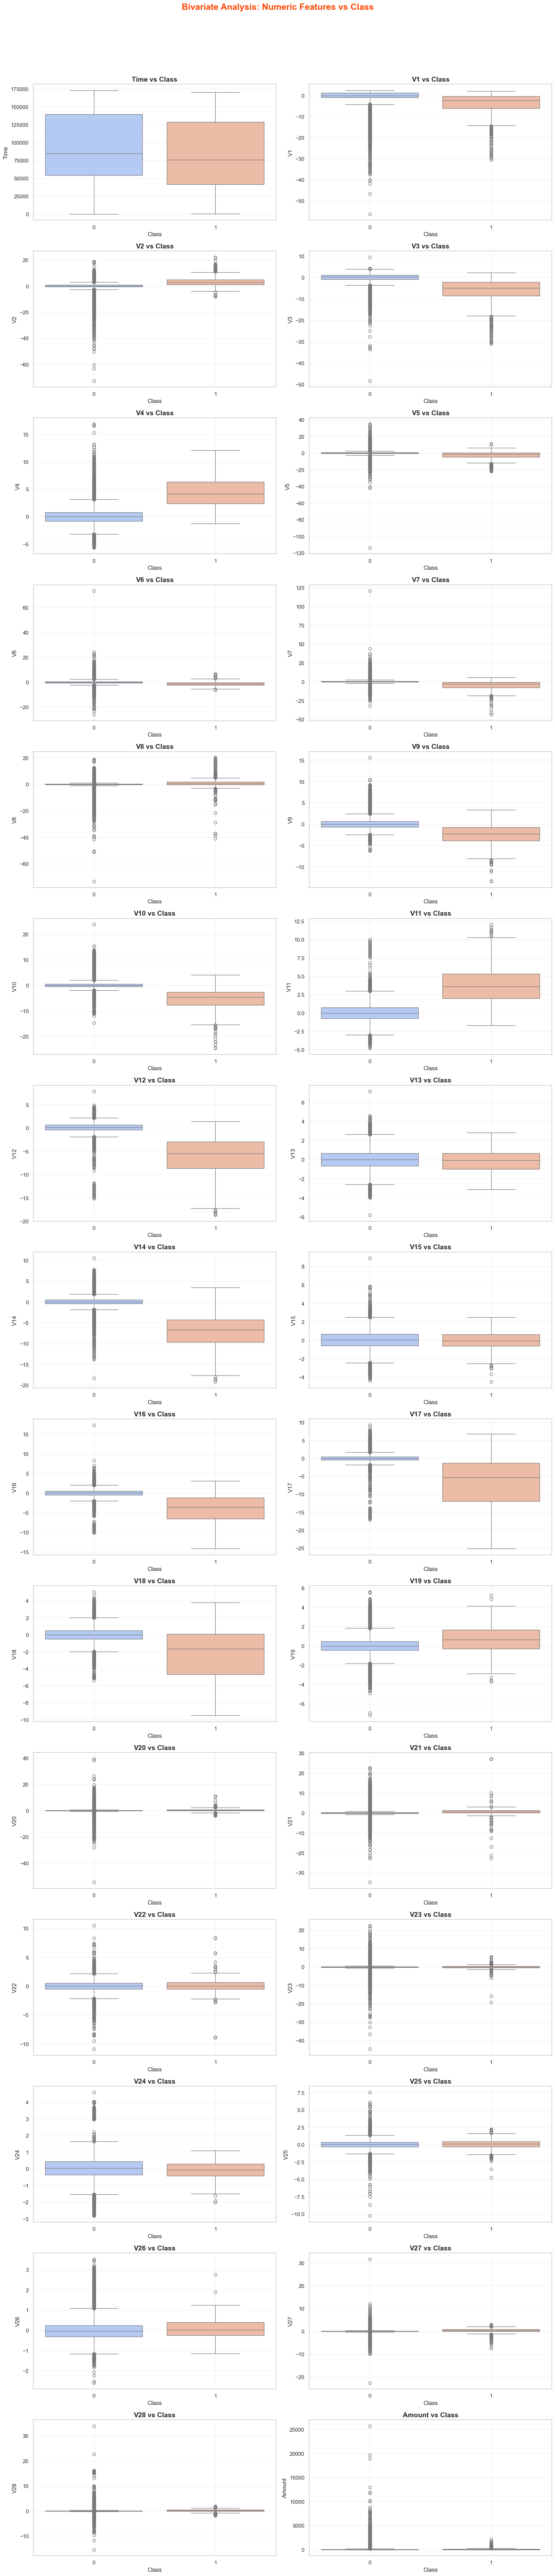

In [14]:
# Numeric columns for bivariate analysis vs Class

import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

# Set theme
sns.set_theme(style="whitegrid", palette="coolwarm")

num_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

rows = math.ceil(len(num_cols) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 5))
axes = axes.flatten()

# Loop through numeric columns
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Class', y=col, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col} vs Class', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Class', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].grid(alpha=0.3)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Bivariate Analysis: Numeric Features vs Class', fontsize=18, fontweight='bold', color='orangered')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<b><span style='color:orangered'>Step 5.4 |</span><span style='color:maroon'> Correlation between Numerical Features</span></b>

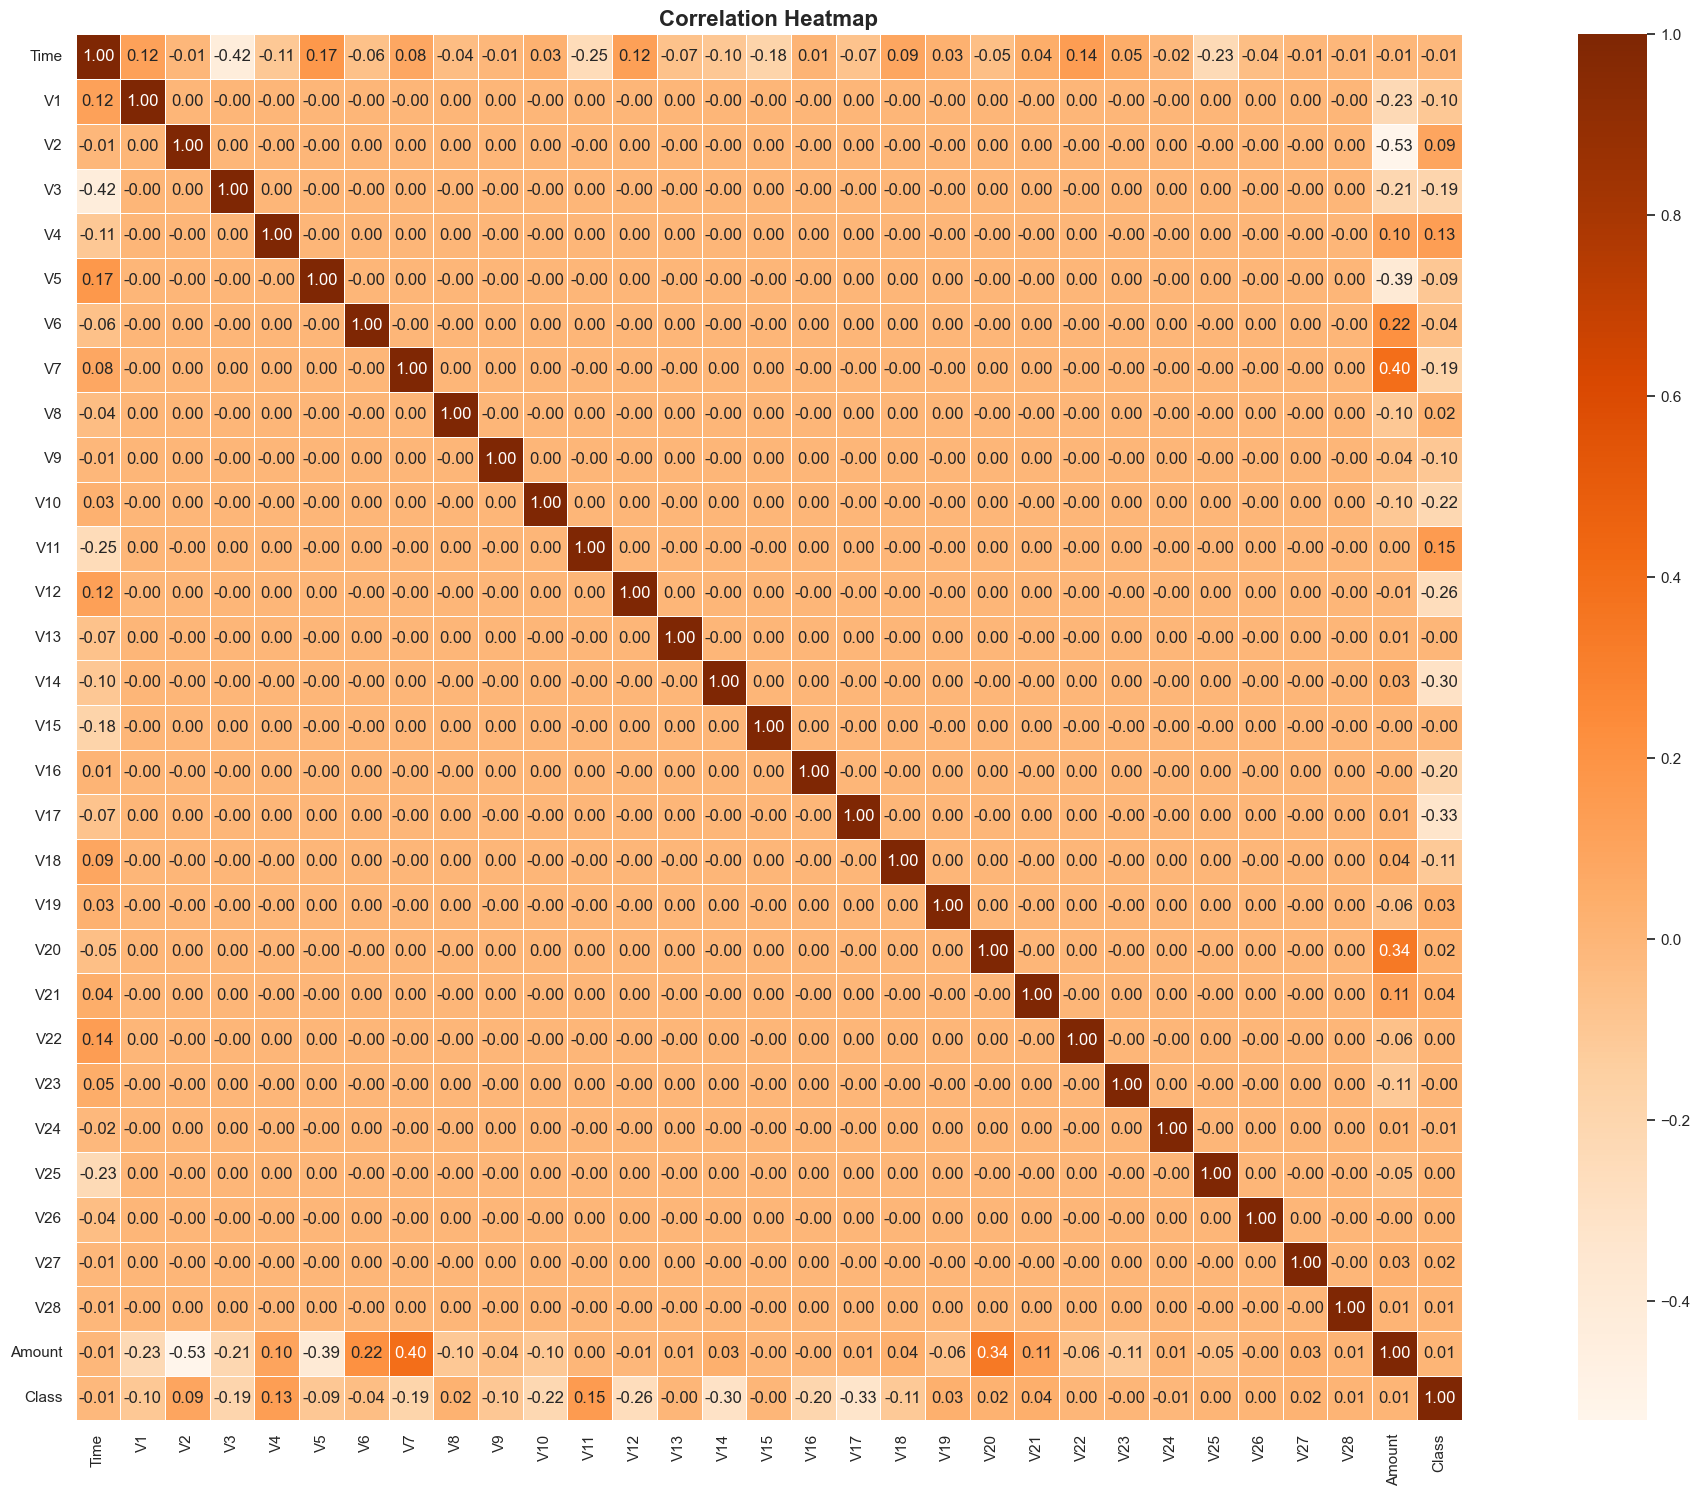

In [15]:
# correlation between numerical features
corr = df.corr(numeric_only=True)
fig = plt.figure(figsize=(30, 18))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Oranges', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

<a id="smote"></a>
# <p style="background-color:#8B0000; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 7 | Handling Class Imbalance (SMOTE)</p>

In [16]:
# Separating features and target label
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train and test (keep test untouched)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training Feature Shape:", X_train.shape)
print("Test Feature Shape:", X_test.shape)
print("Training Target Distribution:\n", y_train.value_counts())
print("Test Target Distribution:\n", y_test.value_counts())

Training Feature Shape: (227845, 30)
Test Feature Shape: (56962, 30)
Training Target Distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
Test Target Distribution:
 Class
0    56864
1       98
Name: count, dtype: int64


<a id="models"></a>
# <p style="background-color:#8B0000; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 8 | Model Selection & Training</p>

In [17]:
# Resample the dataset to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-Test split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# Train-Validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2,
    stratify=y_train_full, random_state=42
)

In [18]:
# Scaling (Only for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [19]:
# Smaller subset for Optuna (FAST & SAFE)
X_tune, _, y_tune, _ = train_test_split(
    X_train, y_train, train_size=100000,
    stratify=y_train, random_state=42
)

X_tune_scaled = scaler.transform(X_tune)


In [ ]:
# Optuna Objective Functions

warnings.filterwarnings("ignore")                  # Hide Python warnings
optuna.logging.set_verbosity(optuna.logging.ERROR) # Hide Optuna trial logs

# 1. Logistic Regression
def objective_lr(trial):
    model = LogisticRegression(
        C=trial.suggest_float("C", 1e-3, 10, log=True),
        max_iter=1000,
        solver="liblinear",
        class_weight="balanced"
    )
    model.fit(X_tune_scaled, y_tune)
    return f1_score(y_val, model.predict(X_val_scaled))

# 2. Random Forest
def objective_rf(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 250),
        max_depth=trial.suggest_int("max_depth", 5, 20),
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_tune, y_tune)
    return f1_score(y_val, model.predict(X_val))

# 3. XGBoost
def objective_xgb(trial):
    model = XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 250),
        max_depth=trial.suggest_int("max_depth", 3, 8),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.2),
        subsample=0.8,
        verbosity=0,
        colsample_bytree=0.8,
        eval_metric="logloss",
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_tune, y_tune)
    return f1_score(y_val, model.predict(X_val))

# 4. LightGBM
def objective_lgbm(trial):
    model = LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 250),
        num_leaves=trial.suggest_int("num_leaves", 31, 64),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.2),
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1,
        random_state=42,
        verbosity=-1
    )
    model.fit(X_tune, y_tune)
    return f1_score(y_val, model.predict(X_val))

# 5. CatBoost
def objective_cat(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 250),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.2),
        depth=trial.suggest_int("depth", 3, 8),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1, 10),
        loss_function="Logloss",
        eval_metric="F1",
        random_seed=42,
        verbose=False
    )
    model.fit(X_tune, y_tune)
    return f1_score(y_val, model.predict(X_val))

In [ ]:
# Run Optuna Optimization
models = {
    "Logistic Regression": objective_lr,
    "Random Forest": objective_rf,
    "XGBoost": objective_xgb,
    "LightGBM": objective_lgbm,
    "CatBoost": objective_cat
}

best_params = {}
best_scores = {}

# Run Optimization for each model
for model_name, objective in models.items():
    print(f"\nOptimizing {model_name}...")

    study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
    study.optimize(objective, timeout=150, show_progress_bar=False)

    best_params[model_name] = study.best_params
    best_scores[model_name] = study.best_value

    print(f"Best F1 Score : {study.best_value:.4f}")
    print(f"Best Params   : {study.best_params}")



🔍 Optimizing Logistic Regression...
✅ Best F1 Score : 0.9815
⚙️ Best Params   : {'C': 9.499832920910258}

🔍 Optimizing Random Forest...
✅ Best F1 Score : 0.9996
⚙️ Best Params   : {'n_estimators': 156, 'max_depth': 20}

🔍 Optimizing XGBoost...
✅ Best F1 Score : 0.9997
⚙️ Best Params   : {'n_estimators': 241, 'max_depth': 6, 'learning_rate': 0.1493535103296411}

🔍 Optimizing LightGBM...
✅ Best F1 Score : 0.9998
⚙️ Best Params   : {'n_estimators': 207, 'num_leaves': 54, 'learning_rate': 0.19685560180473896}

🔍 Optimizing CatBoost...
✅ Best F1 Score : 0.9994
⚙️ Best Params   : {'iterations': 241, 'learning_rate': 0.0982830150066392, 'depth': 8, 'l2_leaf_reg': 6.741745796899547}

🔍 Optimizing Gradient Boosting...
✅ Best F1 Score : 0.9997
⚙️ Best Params   : {'n_estimators': 156, 'max_depth': 8, 'learning_rate': 0.1544389701079389, 'subsample': 0.8795975452591109}


In [28]:
# Final Training + TEST Evaluation

final_models = {
    "Logistic Regression": LogisticRegression(
        **best_params["Logistic Regression"],
        max_iter=1000,
        solver="liblinear",
        class_weight="balanced"
    ),

    "Random Forest": RandomForestClassifier(
        **best_params["Random Forest"],
        n_jobs=-1,
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        **best_params["XGBoost"],
        eval_metric="logloss",
        n_jobs=-1,
        random_state=42
    ),

    "LightGBM": LGBMClassifier(
        **best_params["LightGBM"],
        n_jobs=-1,
        random_state=42,
        verbosity=-1,
        verbose=-1
    ),

    "CatBoost": CatBoostClassifier(
        **best_params["CatBoost"],
        loss_function="Logloss",
        eval_metric="F1",
        verbose=0,
        random_seed=42
    )
}

print("\nFINAL TEST SET PERFORMANCE\n")

for name, model in final_models.items():

    if name in ["Logistic Regression"]:
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(f"==> {name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)


FINAL TEST SET PERFORMANCE

==> Logistic Regression
Accuracy : 0.9807
Precision: 0.9907
Recall   : 0.9704
F1 Score : 0.9805
Confusion Matrix:
[[56347   516]
 [ 1683 55180]]
--------------------------------------------------
==> Random Forest
Accuracy : 0.9997
Precision: 0.9996
Recall   : 0.9999
F1 Score : 0.9997
Confusion Matrix:
[[56838    25]
 [    4 56859]]
--------------------------------------------------
==> XGBoost
Accuracy : 0.9997
Precision: 0.9995
Recall   : 1.0000
F1 Score : 0.9997
Confusion Matrix:
[[56834    29]
 [    0 56863]]
--------------------------------------------------
==> LightGBM
Accuracy : 0.9997
Precision: 0.9996
Recall   : 0.9999
F1 Score : 0.9997
Confusion Matrix:
[[56838    25]
 [    4 56859]]
--------------------------------------------------
==> CatBoost
Accuracy : 0.9995
Precision: 0.9991
Recall   : 1.0000
F1 Score : 0.9995
Confusion Matrix:
[[56810    53]
 [    1 56862]]
--------------------------------------------------


<a id="save"></a>
# <p style="background-color:#8B0000; font-family:calibri; font-size:80%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 12 | Save Final Model</p>

In [29]:
# Balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize XGBoost with your optimized parameters
final_model = XGBClassifier(
    n_estimators=241, 
    max_depth=6, 
    learning_rate=0.1493535103296411,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

# Train the model on the balanced dataset
final_model.fit(X_train_res, y_train_res)

# Save the trained model for deployment
with open("fraud_detection_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("Final XGBoost Model 'fraud_detection_model.pkl' saved successfully!")

Final XGBoost Model 'fraud_detection_model.pkl' saved successfully!


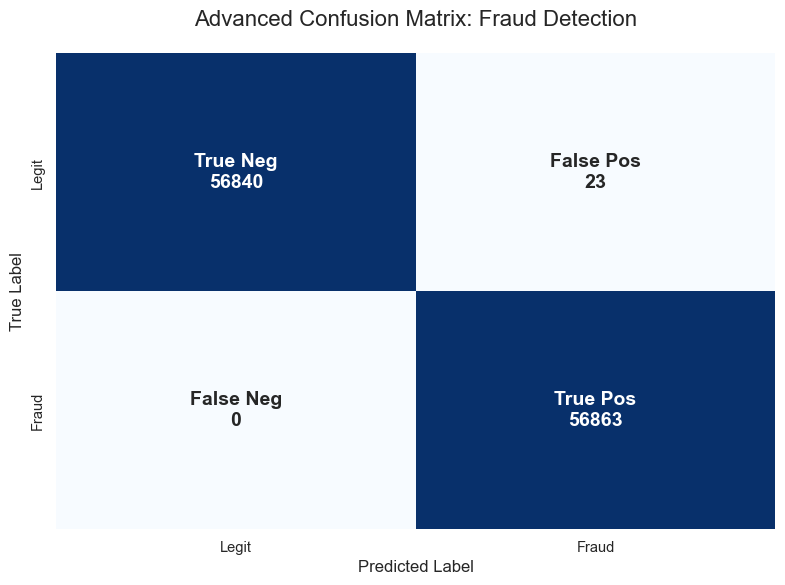

In [30]:
# Generate predictions using your final model
y_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Setup the plot style
plt.figure(figsize=(8, 6))
sns.set_context("paper", font_scale=1.2) # Professional font scaling

# Create Heatmap
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                 xticklabels=['Legit', 'Fraud'], 
                 yticklabels=['Legit', 'Fraud'],
                 annot_kws={"size": 14, "weight": "bold"})

# Add Labels and Title
plt.title('Advanced Confusion Matrix: Fraud Detection', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Professional formatting (adding labels to cells)
# This adds descriptive text to each quadrant
labels = ['True Neg','False Pos','False Neg','True Pos']
for i, text in enumerate(ax.texts):
    current_val = text.get_text()
    text.set_text(f"{labels[i]}\n{current_val}")

plt.tight_layout()
plt.savefig("confusion_matrix_final.png", dpi=300) # Save in high quality for paper
plt.show()

<div style="
    display: flex;
    justify-content: center;
    align-items: center;
    height: 200px;
    background: radial-gradient(circle, #1a1a1a 0%, #000000 100%);
    border-radius: 15px;
    box-shadow: 0 15px 35px rgba(0,0,0,0.8);
    margin: 40px 0;
    overflow: hidden;
">
    <h1 style="
        color: #f1f1f1;
        font-family: 'Garamond', serif;
        font-size: 5rem;
        font-weight: 300;
        letter-spacing: 15px;
        text-transform: uppercase;
        text-shadow: 0 0 20px rgba(255,255,255,0.4);
        margin: 0;
        animation: fadeIn 3s ease-in-out;
    ">
        THE END
    </h1>
</div>

<style>
@keyframes fadeIn {
    0% { opacity: 0; transform: scale(0.95); letter-spacing: 5px; }
    100% { opacity: 1; transform: scale(1); letter-spacing: 15px; }
}
</style>